# Vector AutoRegression:

Multiple equation model for joint determination of two or more variables

• One of the most commonly used models for applied macroeconometric analysis and forecasting in central banks

• In general: k variables 

• An equation for each variable


• There is one error per equation. 
    – The errors are (typically) correlated.



## Motivation

### Unrestricted VAR

• An unrestricted VAR includes all variables in each equation

• A restricted VAR might include some variables in one equation, other variables in another equation

• Old‐fashioned macroeconomic models (so‐called simultaneous equations models of the 1950s, 1960s, 1970s) were essentially restricted VARs – The restrictions and specifications were derived from simplistic macro theory, e.g. Keynesian consumption functions, investment equations, etc.



### Sims and VARs

• Sims argued that the conventional models were restricted VARs, and the restrictions had no substantive justification   

   – Based on incomplete and/or non‐rigorous theory, or intuition

• Sims argued that economists should instead use unrestricted models, e.g. VARs

• He proposed a set of tools for use and evaluation of VARs in practice.

http://www.ssc.wisc.edu/~bhansen/390/


### A VAR is said to be stationary if 

- (1) the expected value of the dependent variables do not depend on time and 

- (2) the covariance matrix of a dependent variable and its lags depends only on the time lapsed and not on the reference period. 

In other words, a VAR system is stationary if the mean and variance of its variables are measurable and do not depend on time.

www.stata.com/manuals13/tsvarstable.pd





A VAR is stationary if all the roots of the characteristic polynomial lie outside the unit circle. EViews tests for stationarity by inverting these roots and plotting them relative to the unit circle. If an inverse root lies outside of the circle, then either some or all variables in the VAR(p)-process are integrated of order one, i.e., I(1). It might be the case, that cointegration between the variables does exist. This instance can then be better analyzed in the context of a VECM.

### reduced-form VARs and structural VARs


In the absence of exogenous variables, the disturbance variance-covariance matrix Σ contains all relevant information about contemporaneous correlation among the variables in $y_t$. 

VARs may be **reduced-form VARs**, which do not account for this contemporaneous correlation.

they may be **structural VARs**, where theory is used to place restrictions on the contemporaneous correlations.

## VAR in Stata

**Stata** has a complete suite of commands for fitting and forecasting vector autoregressive (VAR) models and structural vector autoregressive (SVAR) models. 

Its capabilities include estimating and interpreting 

impulse response functions (IRFs), 

dynamic multipliers, 


and forecast error vector decompositions (FEVDs).




Subsidiary commands allow you to check the stability condition of VAR or SVAR estimates; 

- to compute lag-order selection statistics for VARs; 

- to perform pairwise Granger causality tests for VAR estimates; 

- and to test for residual autocorrelation and normality in the disturbances of VARs.

- Dynamic forecasts may be computed and graphed after VAR or SVAR estimation.

- The `varsoc` command allows you to select the appropriate lag order for the VAR; 


- command `varwle` computes Wald tests to determine whether certain lags can be excluded; 


- `varlmar` checks for autocorrelation in the disturbances; 


- and `varstable` checks whether the stability conditions needed to compute IRFs and FEVDs are satisfied.

In [2]:

%matplotlib inline
import seaborn as sns
import pandas as pd
import ipystata

## Example: GDP and Interest Rate

In [4]:
%%stata -o gdp13
use http://www.ssc.wisc.edu/~bhansen/390/gdp2013.dta
gen rate=d.t12
* summarize
* tsset time
varbasic rate gdp, lags(1/3)
    


(25 missing values generated)

Vector autoregression

Sample:  1954q2 - 2013q4                        Number of obs     =        239
Log likelihood =  -892.5163                     AIC               =    7.58591
FPE            =   6.754369                     HQIC              =   7.667972
Det(Sigma_ml)  =   6.007455                     SBIC              =   7.789552

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
rate                  7     .753808   0.1348   37.22144   0.0000
gdp                   7     3.37814   0.1705   49.13799   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
rate         |
        rate |
         L1. |  -.0716508   .064939

In [9]:
%%stata -d gdp13 -o gdp13
tsset time
summarize
*gen rate=d.t12
*varsoc rate gdp, maxlag(4)


        time variable:  time, 01apr1947 00:00:00 to 01oct2013 00:00:00
                        but with gaps
                delta:  .001 seconds

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       index |        267         133    77.22046          0        266
         gdp |        267    3.290262    3.973982        -10       16.9
         pce |        267     3.40824    3.407401      -11.5       22.1
   pce_goods |        267     3.48839     5.68705      -19.5       33.5
pce_durables |        267    6.341573    16.31103      -46.2      134.2
-------------+---------------------------------------------------------
pce_nondur~s |        267    2.529963    3.242307       -8.6       15.7
pce_services |        267    3.504869    2.117581       -2.9       11.4
         pdi |        267    5.804869    21.21793      -50.5      134.4
   pdi_fixed |        267    4.132584    10.19585        -29


        time variable:  time, 01apr1947 00:00:00 to 01oct2013 00:00:00
                        but with gaps
                delta:  .001 seconds



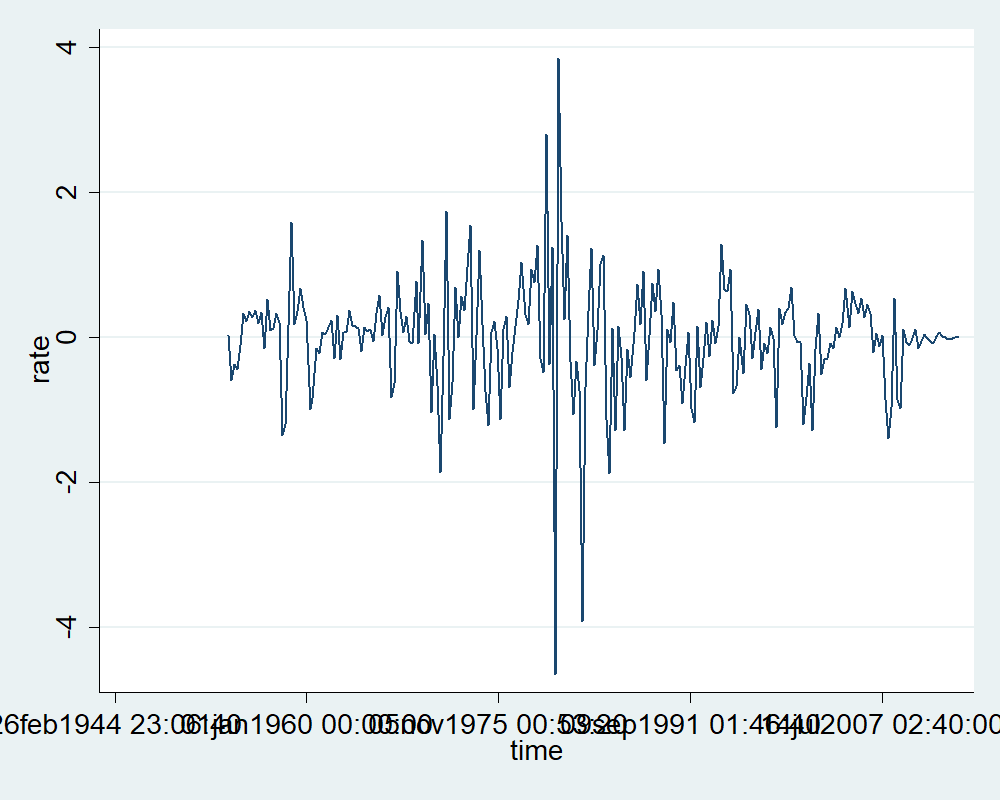

In [11]:
%%stata -d gdp13 -o gdp13
tsset time    
tsline rate

## Canada: Small Macro Model:

Declare and estimate an unrestricted small monetary VAR for Canada, 

- in output gap, (difference between real gdp and gdp trend using hp filter)

- inflation, 

- monetary policy rate 

- and real exchange rate gap, 

over the sample 1994q1 - 2012q4, using 4 lags


As the Canadian Central Bank has been pursuing an inflation-targeting (IT) regime since 1991, it takes variables such as GDP, inflation and the real exchange rate into account when setting the policy rate. At the same time, GDP, inflation and the RER are also influenced by the policy rate itself. Thus, the endogeneity of all variables presents the opportunity to use a VAR to examine the dynamics of the system.

Before estimating the VAR, we first perform some stationarity-inducing transformations. (While not strictly necessary in this case, stationarity has some desirable implications for the estimation results. In this particular example, it also makes economic sense, since monetary policy should react to gaps rather than level variables.)

First we create a new variable lgdp=log(gdp) and use a Hodrick-Prescott (HP) filter (lambda=1600) to estimate a trend component and a cyclical component. EViews can easily do this using the hpf command: hpf lgdp lgdp_trend @ lgdp_gap. The lgdp_gap represents the output gap, a stationary business cycle variable that the central bank is likely to pay attention to when setting its policy rate. We apply the same filter to the real exchange rate and create a real exchange rate gap labeled rer_gap. 


```
'***************************************************************************************
'**************SESSION 3. ESTIMATION OF A VAR *********************************
'***************************************************************************************

' Declare and estimate an unrestricted small monetary VAR, in output gap, inflation, monetary policy rate and real exchange rate gap, over the sample 1994q1 - 2012q4, using 4 lags

' Comments:
' You must specify the order of the VAR (using one or more pairs of lag intervals), and then provide a list of series or groups to be used as endogenous variables. 
' You may include exogenous variables such as trends and seasonal dummies in the VAR by including an “@-sign” followed by a list of series or groups. 
' A constant is automatically added to the list of exogenous variables; to estimate a specification without a constant, you should use the option “noconst”.

smpl 1994q1 2012q4
var var.ls 1 4 lgdp_gap infl mpr rer_gap

```


In [12]:
can = pd.read_csv("table01.csv")

In [13]:
can.head()

,Unnamed: 0,CPI,GDP,INFL,LGDP,LGDP_GAP,MPR,RER,RER_GAP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993Q1,85.1,729128.0,NaN,13.49960,-0.002062,5.98,97.41,4.104962
2,1993Q2,85.4,739668.0,NaN,13.51396,0.000188,4.54,95.27,2.521101
3,1993Q3,85.7,744268.0,NaN,13.52016,-0.005713,4.23,93.41,1.214675
4,1993Q4,86.1,753308.0,NaN,13.53223,-0.005739,4.27,92.41,0.761541


In [14]:
can.rename(columns = {'Unnamed: 0': 'yq'}, inplace = True)

In [15]:
can.columns

Index(['yq', 'CPI', 'GDP', 'INFL', 'LGDP', 'LGDP_GAP', 'MPR', 'RER',
       'RER_GAP'],
      dtype='object')

In [16]:
can.set_index(['yq'], inplace=True)

In [17]:
%%stata -d can
*close all

summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          yq |          0
         CPI |         80    101.8425     11.7194       85.1      122.1
         GDP |         80     1248621    345879.5     729128    1848148
        INFL |         76    1.873936    .9318939   -.779896   4.471545
        LGDP |         80    13.99804    .2861971    13.4996   14.42969
-------------+---------------------------------------------------------
    LGDP_GAP |         80   -.0001054    .0194059   -.055447    .052566
         MPR |         80       3.418    1.796741        .25       7.73
         RER |         80    97.10162    13.85725      79.99      122.4
     RER_GAP |         80    .1543636    4.148413  -15.42682   12.10627



In [18]:
%%stata -d can -o can
gen quarter= quarterly(yq,"yq")
format quarter %tq
tsset quarter



(1 missing value generated)

        time variable:  quarter, 1993q1 to 2012q4
                delta:  1 quarter



In [19]:
%%stata -d can -o can

gen loggdp = log(GDP)


(1 missing value generated)



In [20]:
%%stata -d can -o can
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       index |         81          40    23.52658          0         80
          yq |          0
         CPI |         80    101.8425     11.7194       85.1      122.1
         GDP |         80     1248621    345879.5     729128    1848148
        INFL |         76    1.873936    .9318939   -.779896   4.471545
-------------+---------------------------------------------------------
        LGDP |         80    13.99804    .2861971    13.4996   14.42969
    LGDP_GAP |         80   -.0001054    .0194059   -.055447    .052566
         MPR |         80       3.418    1.796741        .25       7.73
         RER |         80    97.10162    13.85725      79.99      122.4
     RER_GAP |         80    .1543636    4.148413  -15.42682   12.10627
-------------+---------------------------------------------------------
     quarter |         80    1.35e+12



http://www.stata.com/manuals13/tstsfilterhp.pdf

        time variable:  quarter, 01jan1993 00:00:00 to 01oct2012 00:00:00
                        but with gaps
                delta:  .001 seconds



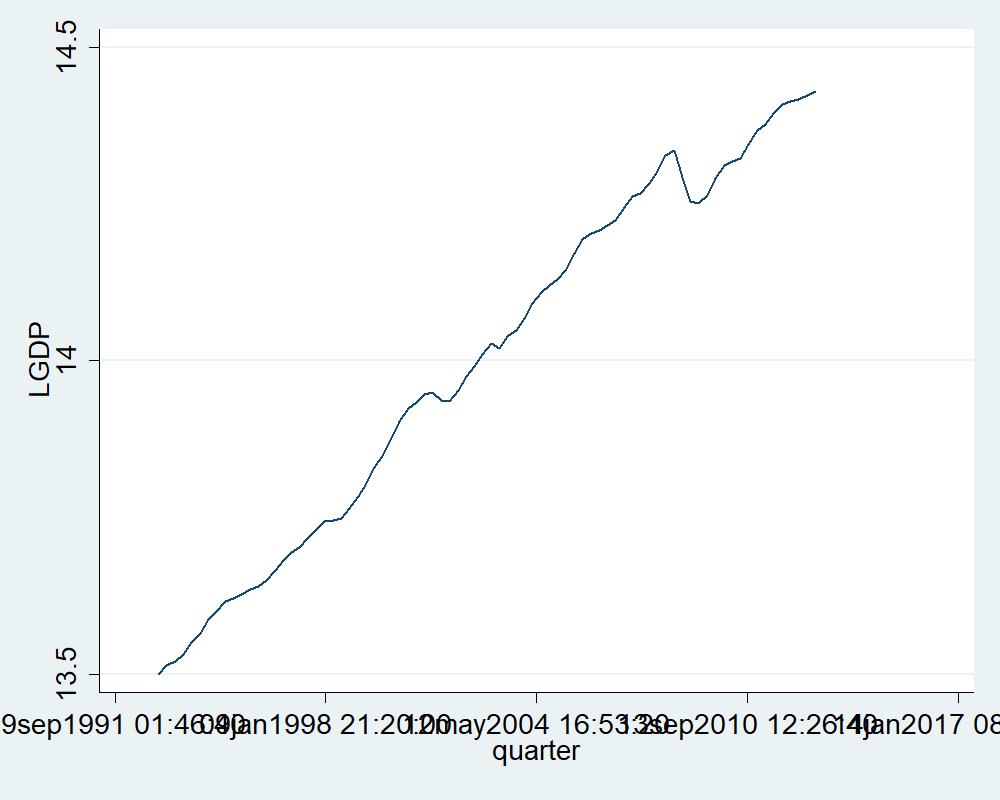

In [22]:
%%stata 
tsset quarter
    
tsline LGDP

In [23]:
%%stata -d can -o can
*gen quarter= quarterly(yq,"yq")
format quarter %tq
tsset quarter

tsfilter hp realgdp_hp = LGDP , smooth(1600) trend(realgdp_tr)

Exception has occured. File could not be loaded. (Note, Pandas needs to be 0.17.x or higher.)

        time variable:  quarter, 1.0e+12 to 1.7e+12, but with gaps
                delta:  1 quarter

Number of gaps in sample:  79
sample may not contain gaps
r(498);



In [24]:
%%stata -d can -o can
gen quarter= quarterly(yq,"yq")
format quarter %tq
tsset quarter
tsfilter hp lgdp_hp = LGDP , smooth(1600) trend(lgdp_tr)

Exception has occured. File could not be loaded. (Note, Pandas needs to be 0.17.x or higher.)

variable quarter already defined
r(110);

        time variable:  quarter, 1.0e+12 to 1.7e+12, but with gaps
                delta:  1 quarter

Number of gaps in sample:  79
sample may not contain gaps
r(498);



In [25]:
%%stata  -d can -o can
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       index |         81          40    23.52658          0         80
          yq |          0
         CPI |         80    101.8425     11.7194       85.1      122.1
         GDP |         80     1248621    345879.5     729128    1848148
        INFL |         76    1.873936    .9318939   -.779896   4.471545
-------------+---------------------------------------------------------
        LGDP |         80    13.99804    .2861971    13.4996   14.42969
    LGDP_GAP |         80   -.0001054    .0194059   -.055447    .052566
         MPR |         80       3.418    1.796741        .25       7.73
         RER |         80    97.10162    13.85725      79.99      122.4
     RER_GAP |         80    .1543636    4.148413  -15.42682   12.10627
-------------+---------------------------------------------------------
     quarter |         80    1.35e+12

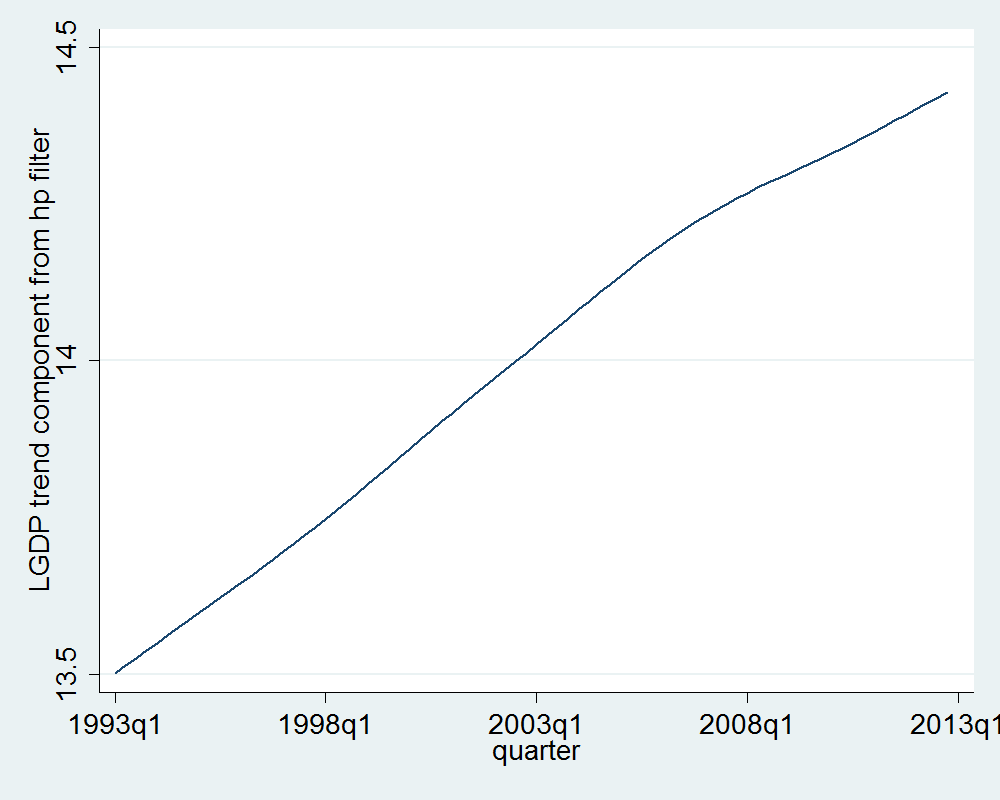

In [90]:
%%stata -d can -o can --graph
tsset quarter
    
tsline lgdp_tr

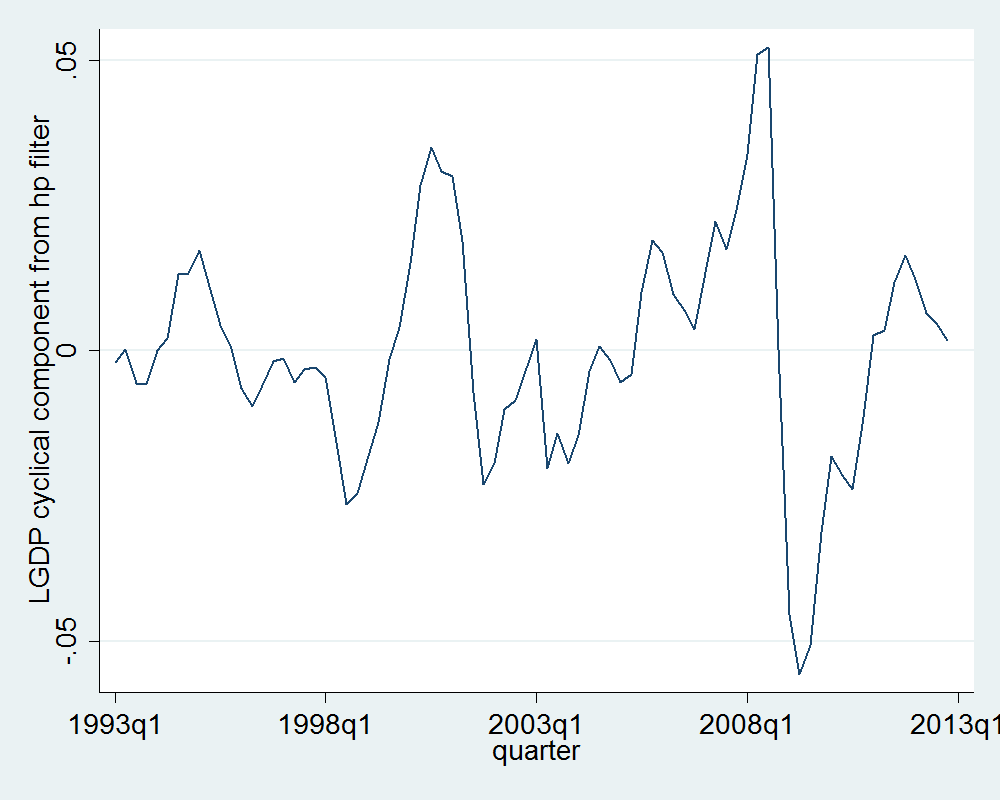

In [91]:
%%stata -d can -o can --graph
    
tsline lgdp_hp

let’s estimate  VAR for Canada , which should be similar to the original canada VAR  that it uses the RER gap.  Estimate a VAR from 1993q1 to 2012q4 using lgdp_gap, rer, infl and mpr as the endogenous variables. Include a constant in your specification and 4 lags.

Hint: In EViews You can do this by opening the VAR Object, then: View / Lag Structure / AR Roots Graph.




In [106]:
%%stata  -d can -o can


var LGDP_GAP  INFL  MPR  RER_GAP  if tin(,2012q4), lags(1/4)



Vector autoregression

Sample:  1995q1 - 2012q4                        Number of obs     =         72
Log likelihood =   38.54555                     AIC               =   .8181793
FPE            =   .0000276                     HQIC              =   1.674174
Det(Sigma_ml)  =   4.03e-06                     SBIC              =   2.968364

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
LGDP_GAP             17     .008636   0.8601    442.683   0.0000
INFL                 17     .490404   0.7452   210.5699   0.0000
MPR                  17     .386802   0.9645   1957.642   0.0000
RER_GAP              17     2.68432   0.6974   165.9034   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+-------------------------------

and `varstable` checks whether the stability conditions needed to compute IRFs and FEVDs are satisfied.


   Eigenvalue stability condition
  +----------------------------------------+
  |        Eigenvalue        |   Modulus   |
  |--------------------------+-------------|
  |   .8266698 +  .1949309i  |   .849342   |
  |   .8266698 -  .1949309i  |   .849342   |
  |   .7341471 +  .3860769i  |   .829474   |
  |   .7341471 -  .3860769i  |   .829474   |
  |   .5074282 +  .6451756i  |   .820814   |
  |   .5074282 -  .6451756i  |   .820814   |
  |   .7858061 + .07559951i  |   .789434   |
  |   .7858061 - .07559951i  |   .789434   |
  |  -.4718571 +  .6225616i  |   .781174   |
  |  -.4718571 -  .6225616i  |   .781174   |
  |  -.1597111 +  .6822111i  |   .700657   |
  |  -.1597111 -  .6822111i  |   .700657   |
  |   .0691373 +  .6494016i  |   .653072   |
  |   .0691373 -  .6494016i  |   .653072   |
  |  -.3039098 +  .1908692i  |   .358876   |
  |  -.3039098 -  .1908692i  |   .358876   |
  +----------------------------------------+
   All the eigenvalues lie inside the unit circle.
   VAR satisfi

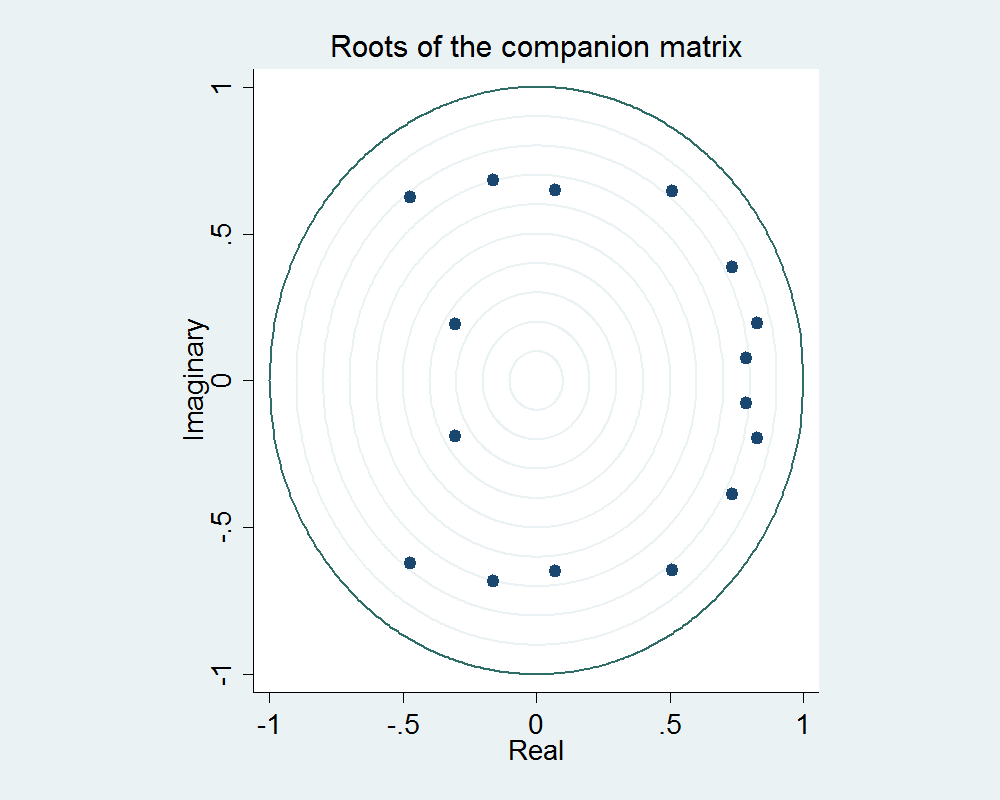

In [38]:
%%stata -d can -o can --graph
stable, graph

The original canada VAR is stable because all of its inverse roots are inside of the unit circle, as shown in the  graph above:



```
'***************************************************************************************
'**************SESSION 7. RESIDUAL DIAGNOSTICS****************************
'***************************************************************************************

' Plot residuals
freeze(mode=overwrite, residuals) var.resids

' Perform residual diagnostics

' Display the covariances of the residuals from each equation in the VAR object
freeze(mode=overwrite, residcov) var.residcov

' Display the covariances of the residuals from each equation in the VAR object
freeze(mode=overwrite, residcorrel) var.correl(8)

' Perform multivariate residual serial correlation LM test using an estimated VAR
freeze(mode=overwrite, lmtest) var.arlm(8)
```

As we did in a previous question, let’s estimate another VAR for Canada (let’s call it canada1), which should be similar to the original canada VAR except that it uses the RER in levels, rather than the RER gap. In all other respects the VARs are similar. Estimate a VAR from 1993q1 to 2012q4 using lgdp_gap, rer, infl and mpr as the endogenous variables. Include a constant in your specification and 4 lags.

Hint: You can do this by opening the VAR Object, then: View / Lag Structure / AR Roots Graph.


```
'***************************************************************************************
'**************SESSION 6. STATIONARITY. **************************
'***************************************************************************************

' Checking stationary of the VAR
' Compute the inverse roots of the characteristic AR polynomial.
' Comments:
' This command plots the roots together with a unit circle. The VAR is stable if all of the roots are inside the unit circle.
freeze(mode=overwrite, roots) var.arroots(graph)
```

In [11]:
%%stata -d can -o can --graph

var LGDP_GAP  INFL  MPR  RER  if quarter >=tq(1993q1) & quarter <=tq(2012q4), lags(1/4)




Vector autoregression

Sample:  1995q1 - 2012q4                        Number of obs     =         72
Log likelihood =   37.34389                     AIC               =   .8515587
FPE            =   .0000286                     HQIC              =   1.707554
Det(Sigma_ml)  =   4.16e-06                     SBIC              =   3.001743

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
LGDP_GAP             17     .008524   0.8637   456.3274   0.0000
INFL                 17     .524253   0.7088   175.2593   0.0000
MPR                  17     .345083   0.9718   2478.043   0.0000
RER                  17     2.94647   0.9677   2156.727   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+-------------------------------


   Eigenvalue stability condition
  +----------------------------------------+
  |        Eigenvalue        |   Modulus   |
  |--------------------------+-------------|
  |   1.002769               |   1.00277   |
  |   .8490385 +  .2419673i  |   .882845   |
  |   .8490385 -  .2419673i  |   .882845   |
  |   .5736372 +  .6686716i  |   .881012   |
  |   .5736372 -  .6686716i  |   .881012   |
  |   .7799909 +  .3937851i  |   .873758   |
  |   .7799909 -  .3937851i  |   .873758   |
  |  -.4750592 +  .6025537i  |   .767302   |
  |  -.4750592 -  .6025537i  |   .767302   |
  |  -.2056729 +  .7006375i  |   .730202   |
  |  -.2056729 -  .7006375i  |   .730202   |
  |  .06800859 +  .6754484i  |   .678864   |
  |  .06800859 -  .6754484i  |   .678864   |
  |     .50852               |    .50852   |
  |  -.2921636 +  .2663154i  |   .395327   |
  |  -.2921636 -  .2663154i  |   .395327   |
  +----------------------------------------+
   At least one eigenvalue is at least 1.0.
   VAR does not satis

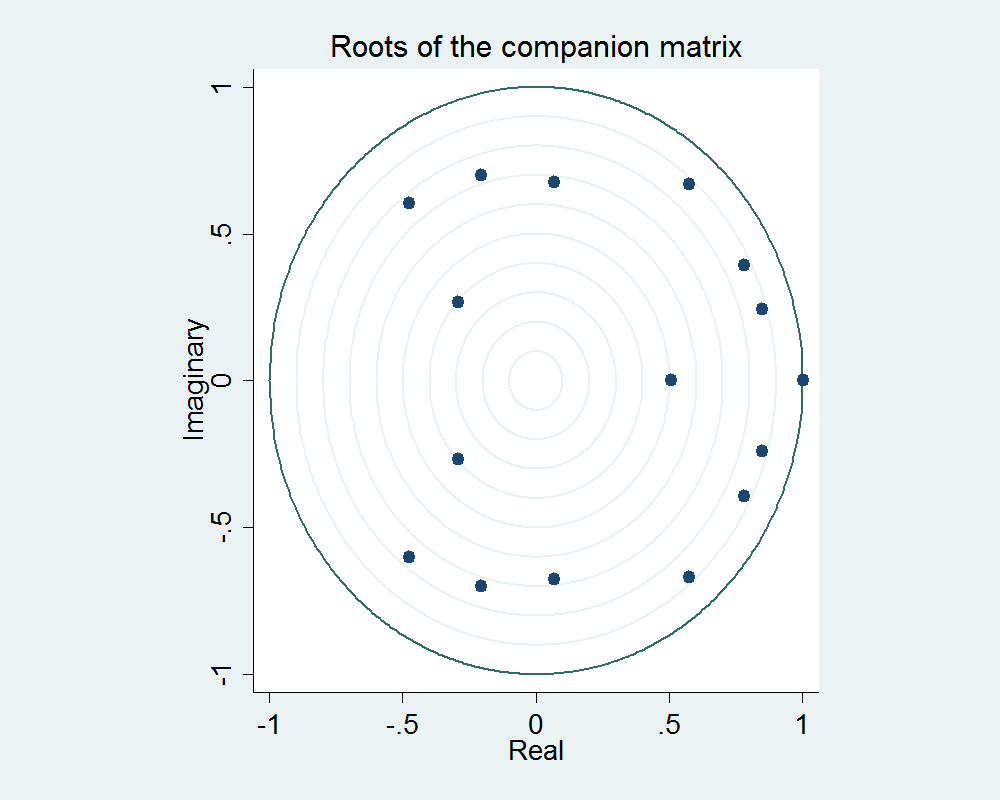

In [44]:
%%stata -d can -o can --graph
varstable, graph

On the other hand, the second VAR canada1 is not stable because one of its roots is approximately (very close to) 1, as can be seen in the picture above:

## Lag Specification Criteria

VARs are very densely parameterized and exhibit the “curse” of dimensionality. 





Suppose that we are estimating a quarterly VAR with 3 endogenous variables, a constant and 4 lags.

In  case n=3 and p=4. The total number of coefficients to be estimated is n*(1+n*p) thus 3*(1+3*4) = 39.

The number of parameters grows at a quadratic rate as more variables/lags of variables are added, using up an increasing amount of degrees of freedom. So using too many lags worsens the “over-fitting” problem and generally leads to poor quality estimates and bad forecasts. 


On the other hand, including too few lags can lead to residuals not being white noises (for example display autocorrelation), which is an issue in a stationary VAR.


In a k‐variable system, the number of coefficients in each equation is 1+kp 


– The total number is k(1+2p)=k+2kp


• How should p be selected? 


• Common approach: – Information criterion, primarily AIC




#### When estimating a VAR, why is the selection of the appropriate lag length crucial? 
If the number of lags is too long, the model will use up too many degrees of freedom, leading to poor estimates.
If the number of lags is not sufficient, the residuals from the estimation may not constitute individual white noises.


```
'***************************************************************************************
'**************SESSION 6. LAG LENGTH**************************
'***************************************************************************************


' Perform VAR lag order selection 
' Note: You must specify the maximum lag order m for which you wish to test.
freeze(mode=overwrite, laglen)  var.laglen(8)
'show var.laglen(8, name=laglen)

' After checking lag length criteria (AIC, SIC, etc) --  restimate the model with the chosen number of lags (in this case, 2)
var var.ls 1 2 lgdp_gap infl mpr rer_gap 

```




#### AIC and BIC for VAR Models 


where L is log‐likelihood from model 

• Select model with smallest AIC (or BIC)


We may also want to compute selection order criteria to gauge whether we have included sufficient lags in the VAR. Introducing too many lags wastes degrees of freedom, while too few lags leave the equations potentially misspecified and are likely to cause autocorrelation in the residuals. The `varsoc` command will produce selection order criteria, and highlight the optimal lag.

The `varsoc` command allows you to select the appropriate lag order for the VAR; 



In [54]:
%%stata  -d can -o can



varsoc LGDP_GAP  INFL  MPR  RER_GAP, maxlag(8)


   Selection-order criteria
   Sample:  1996q1 - 2012q4                     Number of obs      =        68
  +---------------------------------------------------------------------------+
  |lag |    LL      LR      df    p      FPE       AIC      HQIC      SBIC    |
  |----+----------------------------------------------------------------------|
  |  0 | -204.876                      .005472    6.1434   6.19514   6.27396  |
  |  1 | -23.3858  362.98   16  0.000  .000042   1.27605   1.53471   1.92885  |
  |  2 |  22.4701  91.712   16  0.000  .000018   .397939   .863523*  1.57297* |
  |  3 |  40.7339  36.528   16  0.002  .000017*  .331357*  1.00387   2.02863  |
  |  4 |  53.3514  25.235   16  0.066  .000019   .430841   1.31028   2.65035  |
  |  5 |  63.8646  21.026   16  0.177  .000023   .592217   1.67858   3.33396  |
  |  6 |   73.712  19.695   16  0.234  .000029   .773177   2.06647   4.03716  |
  |  7 |  92.8746  38.325   16  0.001  .000029   .680159   2.18037   4.46638  |
  |  8 |  11

According to the SC and HQ criteria, 2 lags are sufficient. The AIC would suggest 3 lags. This would suggest that 2 (at most 3 lags) should be sufficient. We shall proceed with 2 lags and re-estimate the model in later questions.
















## VAR Diagnostics: Residuals 



```
'***************************************************************************************
'**************SESSION 7. RESIDUAL DIAGNOSTICS****************************
'***************************************************************************************

' Plot residuals
freeze(mode=overwrite, residuals) var.resids

' Perform residual diagnostics

' Display the covariances of the residuals from each equation in the VAR object
freeze(mode=overwrite, residcov) var.residcov

' Display the covariances of the residuals from each equation in the VAR object
freeze(mode=overwrite, residcorrel) var.correl(8)

' Perform multivariate residual serial correlation LM test using an estimated VAR
freeze(mode=overwrite, lmtest) var.arlm(8)
```




##### In Stata

command `varwle` computes Wald tests to determine whether certain lags can be excluded; 


In [52]:
%%stata  -d can -o can
varwle


   Equation: LGDP_GAP
  +------------------------------------+
  | lag |    chi2      df  Prob > chi2 |
  |-----+------------------------------|
  |   1 |  146.4465     4     0.000    |
  |   2 |  18.04885     4     0.001    |
  |   3 |  5.685959     4     0.224    |
  |   4 |  4.726211     4     0.317    |
  +------------------------------------+

   Equation: INFL
  +------------------------------------+
  | lag |    chi2      df  Prob > chi2 |
  |-----+------------------------------|
  |   1 |    70.621     4     0.000    |
  |   2 |   4.60269     4     0.331    |
  |   3 |  7.563809     4     0.109    |
  |   4 |  17.47297     4     0.002    |
  +------------------------------------+

   Equation: MPR
  +------------------------------------+
  | lag |    chi2      df  Prob > chi2 |
  |-----+------------------------------|
  |   1 |    199.52     4     0.000    |
  |   2 |  19.38816     4     0.001    |
  |   3 |   16.0401     4     0.003    |
  |   4 |  27.30509     4     0.000   

`varlmar` checks for autocorrelation in the disturbances; 



In [53]:
%%stata 
varlmar


   Lagrange-multiplier test
  +--------------------------------------+
  | lag  |      chi2    df   Prob > chi2 |
  |------+-------------------------------|
  |   1  |   20.4823    16     0.19928   |
  |   2  |   17.6337    16     0.34578   |
  +--------------------------------------+
   H0: no autocorrelation at lag order



## Interpretation


• It is difficult to interpret the large number of coefficients in the VAR model


• Main tools for interpretation – Impulse responses


• The impulse responses are the time‐paths of to y and x in response to shocks


• The errors may be correlated. 


• We “orthogonalize” them


### Orthogonalized Model

• The shocks u1 and u2 are uncorrelated 

• The ordering matters – The shock to y affects both y and x in period t 

      – The shock to x affects only x in period t


• The impulse responses are the time‐paths of to y and x in response to the shocks u1 and u2


• Imagine y=0 and x=0. Set u1=1. Trace the history of y and x

#### Impulse Responses by Recursion


• The impulse responses are these time‐paths of y and x due to the shocks u1 and u2


• They are found by this recursion formula 


• They are functions of the estimated VAR coefficients

• In a k‐variable system, there are k^2 impulse response functions!


##### Stata Calculation

• Impulse response automatically calculated with `varbasic` command

• A $kxk$ matrix of impulse response is created




Vector autoregression

Sample:  1993q3 - 2012q4                        Number of obs     =         78
Log likelihood =   198.8525                     AIC               =  -4.842373
FPE            =   .0000271                     HQIC              =   -4.72142
Det(Sigma_ml)  =   .0000209                     SBIC              =  -4.540231

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
LGDP                  5     .010262   0.9987   60557.97   0.0000
MPR                   5     .477116   0.9327   1081.541   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
LGDP         |
        LGDP |
         L1. |   1.483425    .100213    14.80   0.000     1.287011

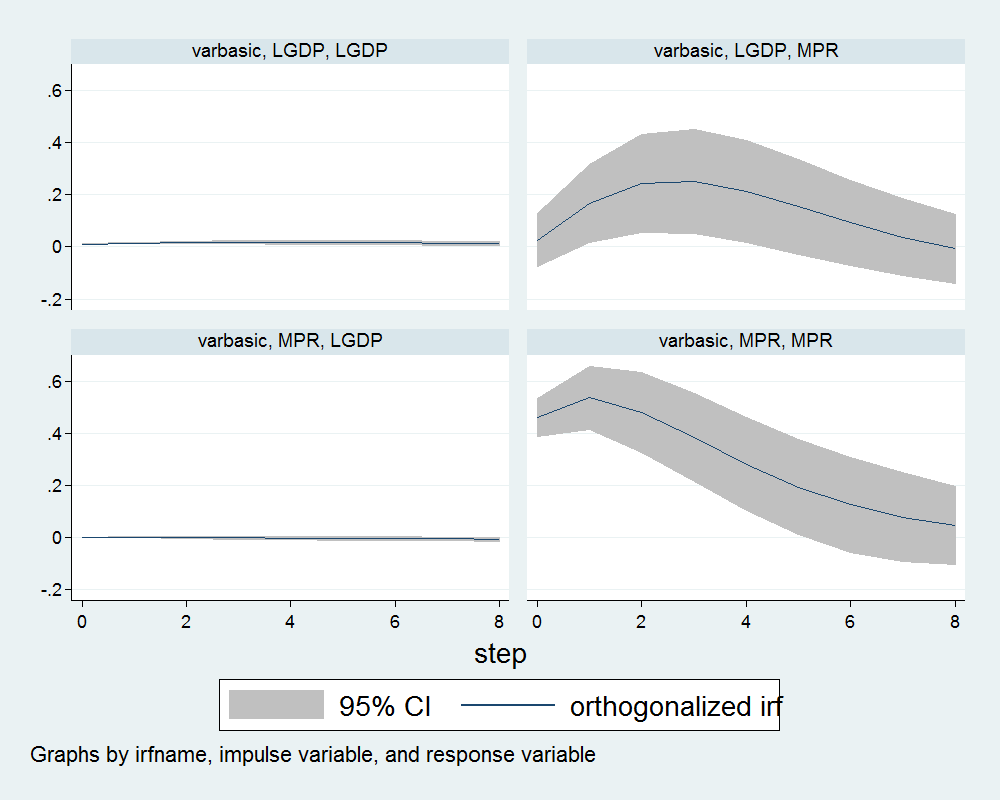

In [58]:
%%stata -d can -o can --graph

varbasic LGDP MPR 

#### Interpretation


• Labeled “Graphs by irfname, impulse variable, and response variable” – “Impulse variable” means the source of the shock – “Response variable” means the variable being affected


• Upper left: “varbasic, gdp, gdp” – Impact of a gdp shock on the time‐path of gdp


• Upper right: “varbasic, gdp, rate” – Impact of a gdp shock on the time‐path of interest rates


• Lower left: “varbasic, rate, gdp,” – Impact of an interest rate shock on the time‐path of gdp


• Lower fight: “varbasic, rate, rate” – Impact of an interest rate shock on the time‐path of interest rates


• The impulse response is graphed as a function of forward time periods


Vector autoregression

Sample:  1994q3 - 2012q4                        Number of obs     =         74
Log likelihood =  -8.516176                     AIC               =    1.20314
FPE            =   .0000393                     HQIC              =   1.650279
Det(Sigma_ml)  =   .0000148                     SBIC              =   2.324036

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
LGDP_GAP              9      .00852   0.8410   391.4818   0.0000
INFL                  9     .587056   0.6206   121.0351   0.0000
MPR                   9     .455422   0.9438   1241.999   0.0000
RER_GAP               9     2.58345   0.6732   152.4214   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+-------------------------------

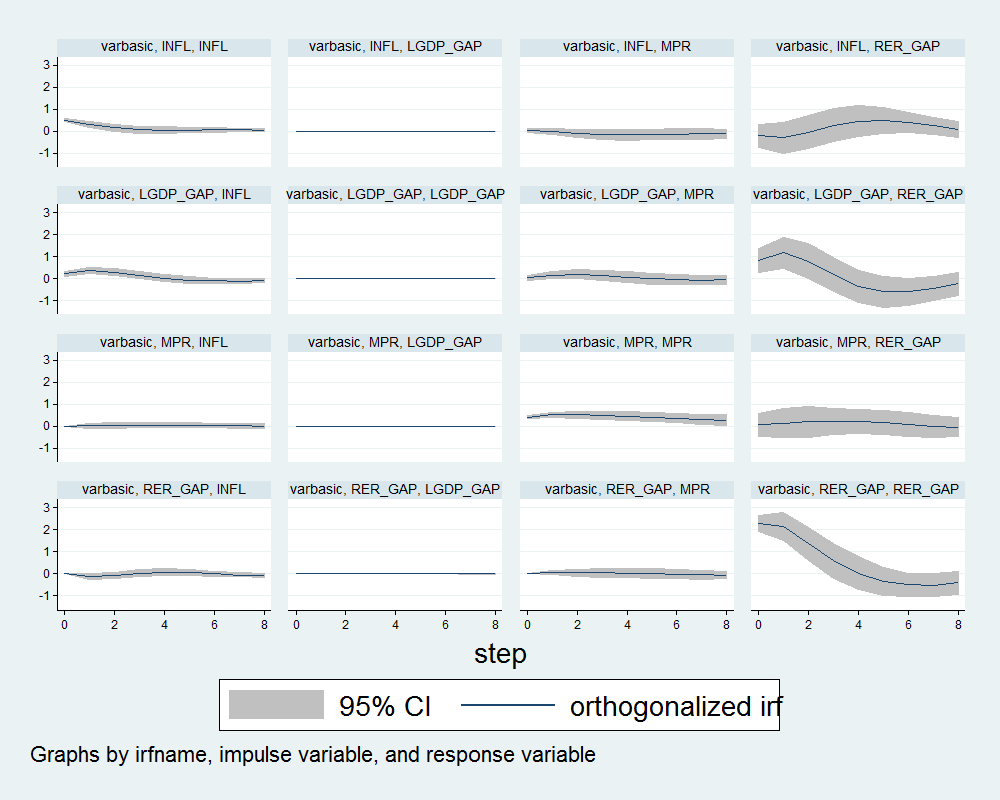

In [59]:
%%stata -d can -o can --graph

varbasic LGDP_GAP  INFL  MPR  RER_GAP

## Scale

• The graphs are all created on the same scale, so difficult to read

• It may be better to create graphs separate for each impulse response

• This creates the impulse response for the impact of a gdp shock on the time‐path of interest rates

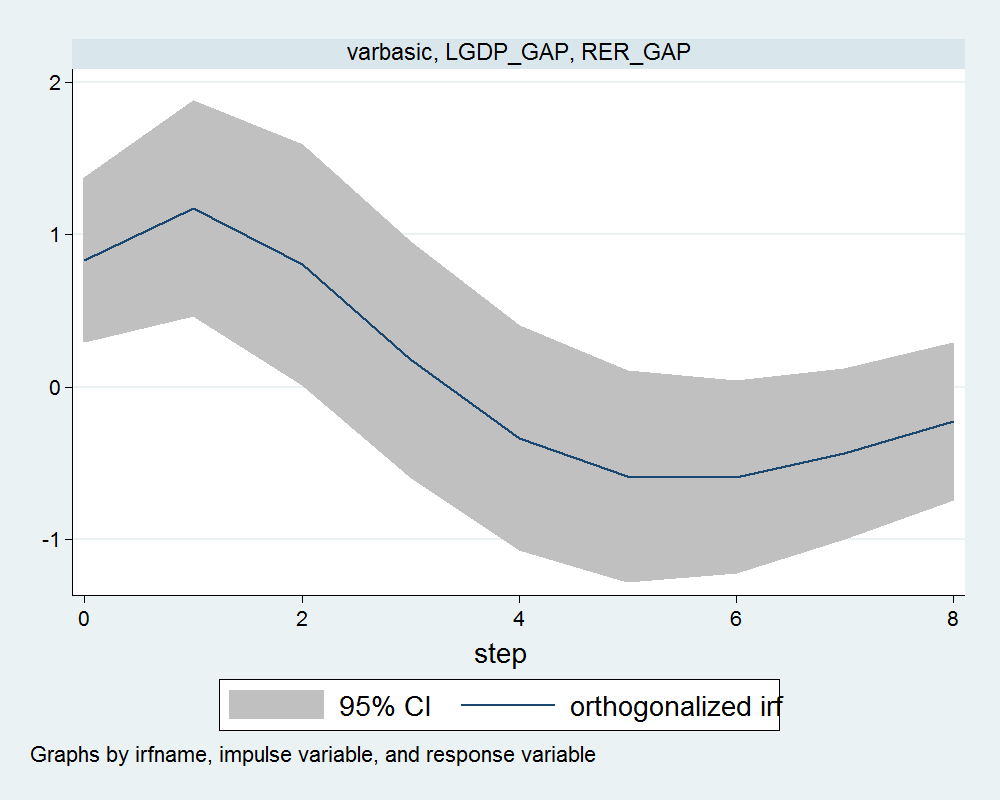

In [62]:
%%stata -d can -o can --graph

irf graph oirf, impulse(LGDP_GAP) response(RER_GAP)

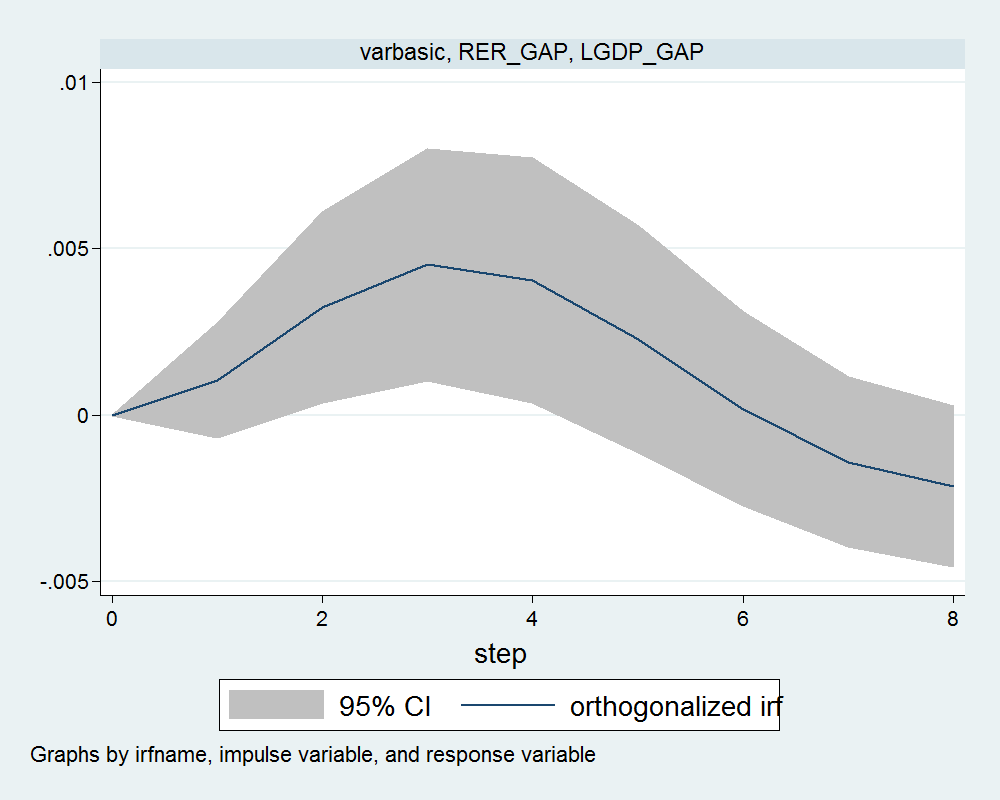

In [93]:
%%stata --graph

irf graph oirf, impulse(RER_GAP) response(LGDP_GAP)

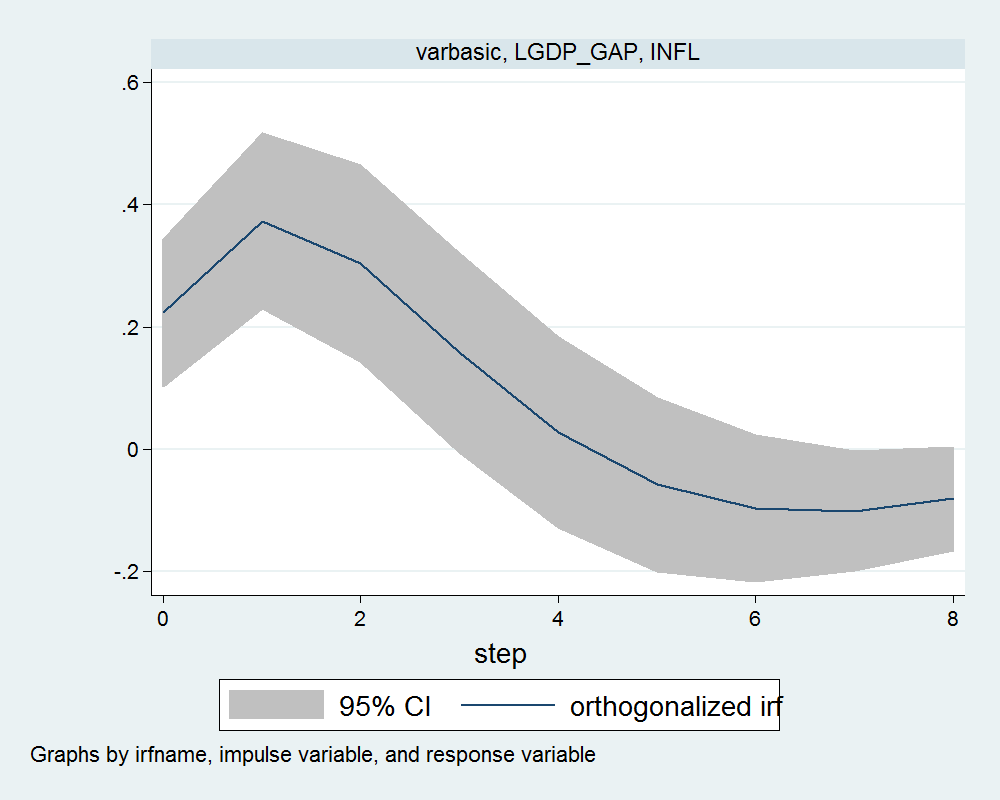

In [64]:
%%stata -d can -o can --graph
var LGDP_GAP  INFL  MPR  RER_GAP 
irf graph oirf, impulse(LGDP_GAP) response(INFL)

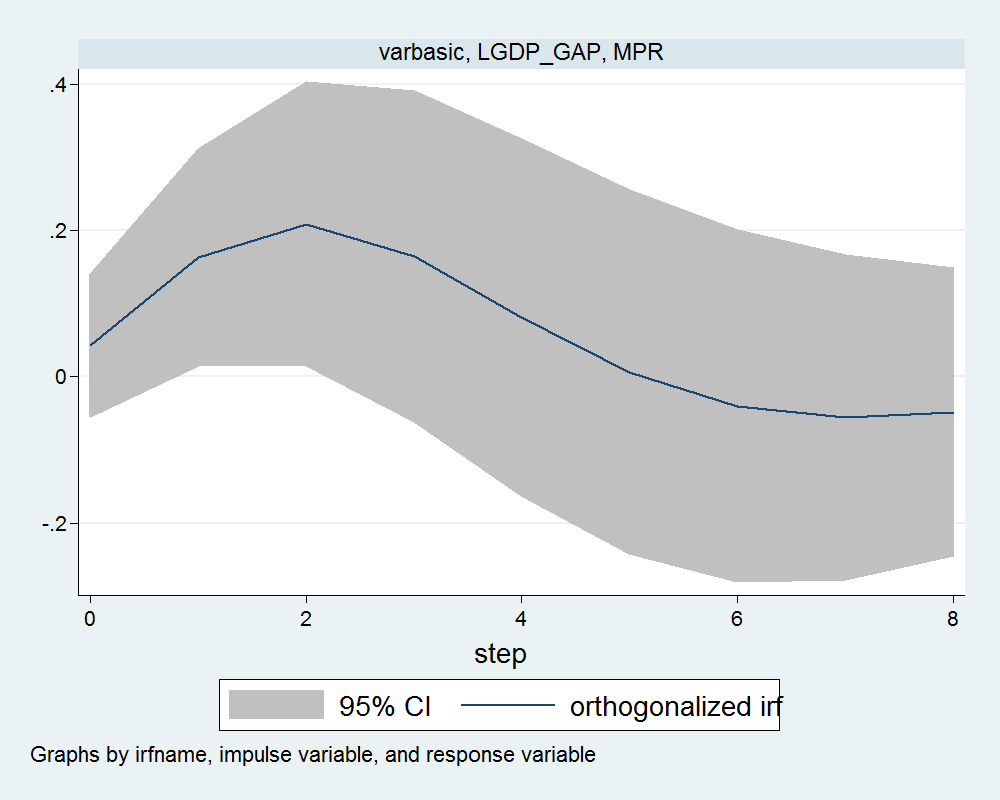

In [65]:
%%stata --graph

irf graph oirf, impulse(LGDP_GAP) response(MPR)

For IRFs to be computed, the VAR must be stable. The simple IRFs shown above have a drawback: they give the effect over time of a one-time unit increase to one of the shocks, holding all else constant. But to the extent the shocks are contemporaneously correlated, the other shocks cannot be held constant, and the VMA form of the VAR cannot have a causal interpretation.




## FEVDs


The forecast error variance decomposition (FEVD) measures the fraction of the forecast error variance of an endogenous variable that can be attributed to orthogonalized shocks to itself or to another endogenous variable.



As any of the VAR estimation commands save the estimated IRFs, OIRFs and FEVDs in an .irf file, you may examine the FEVDs with a graph command. These items may also be tabulated with the `irf tabl` and `irf ctable` commands. 


The latter command allows you to juxtapose tabulated values, such as the OIRF and FEVD for a particular pair of variables, while the `irf cgraph` command allows you to do the same for graphs. . 

    irf graph fevd, lstep(1)


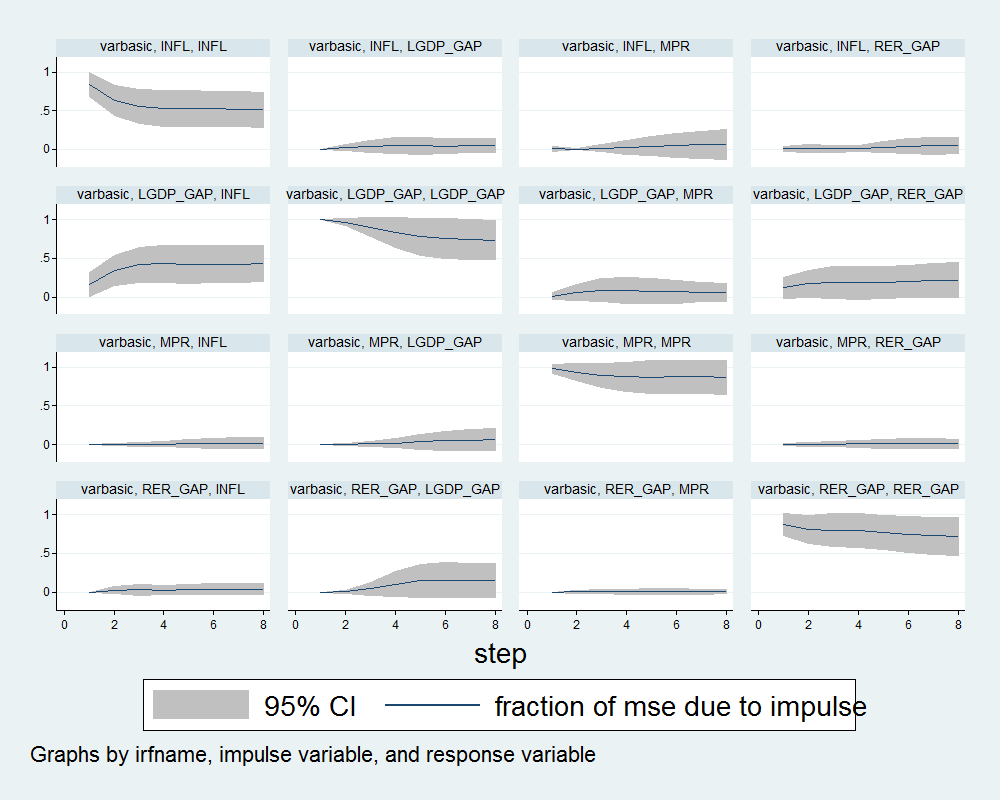

In [95]:
%%stata -d can -o can --graph


irf graph fevd, lstep(1)

After producing any graph in Stata, you may save it in Stata’s internal format using graph save filename. 

This will create a .gph file which may be accessed with graph use. The file contains all the information necessary to replicate the graph and modify its appearance. However, only Stata can read .gph files. 

If you want to reproduce the graph in a document, use the graph export filename.format command, where format is .eps or .pdf.

A common diagnostic from a VAR are the set of block F tests, or Granger causality tests, that consider whether each variable plays a significant role in each of the equations. 


These tests may help to establish a sensible `causal ordering`. They can be performed by vargranger:

In [101]:
%%stata -d can -o can 

var LGDP_GAP  INFL  MPR  RER_GAP  if quarter >=tq(1993q1) & quarter <=tq(2012q4), lags(1/4)
vargranger

Vector autoregression

Sample:  1995q1 - 2012q4                        Number of obs     =         72
Log likelihood =   38.54555                     AIC               =   .8181793
FPE            =   .0000276                     HQIC              =   1.674174
Det(Sigma_ml)  =   4.03e-06                     SBIC              =   2.968364

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
LGDP_GAP             17     .008636   0.8601    442.683   0.0000
INFL                 17     .490404   0.7452   210.5699   0.0000
MPR                  17     .386802   0.9645   1957.642   0.0000
RER_GAP              17     2.68432   0.6974   165.9034   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+--------------------------------

In [102]:
%%stata 

var RER_GAP LGDP_GAP INFL  MPR    if quarter >=tq(1993q1) & quarter <=tq(2012q4), lags(1/4)

Vector autoregression

Sample:  1995q1 - 2012q4                        Number of obs     =         72
Log likelihood =   38.54555                     AIC               =   .8181793
FPE            =   .0000276                     HQIC              =   1.674174
Det(Sigma_ml)  =   4.03e-06                     SBIC              =   2.968364

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
RER_GAP              17     2.68432   0.6974   165.9034   0.0000
LGDP_GAP             17     .008636   0.8601    442.683   0.0000
INFL                 17     .490404   0.7452   210.5699   0.0000
MPR                  17     .386802   0.9645   1957.642   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+--------------------------------

In [103]:
%%stata  --graph

varbasic RER_GAP LGDP_GAP INFL  MPR    if quarter >=tq(1993q1) & quarter <=tq(2012q4)

Vector autoregression

Sample:  1994q3 - 2012q4                        Number of obs     =         74
Log likelihood =  -8.516176                     AIC               =    1.20314
FPE            =   .0000393                     HQIC              =   1.650279
Det(Sigma_ml)  =   .0000148                     SBIC              =   2.324036

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
RER_GAP               9     2.58345   0.6732   152.4214   0.0000
LGDP_GAP              9      .00852   0.8410   391.4818   0.0000
INFL                  9     .587056   0.6206   121.0351   0.0000
MPR                   9     .455422   0.9438   1241.999   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+--------------------------------

In [33]:
%%stata
tsset quarter
var RER_GAP LGDP_GAP

        time variable:  quarter, 01jan1993 00:00:00 to 01oct2012 00:00:00
                        but with gaps
                delta:  .001 seconds

no observations
r(2000);



In [29]:
%%stata  -d can -o can 
tsset quarter
summarize


        time variable:  quarter, 01jan1993 00:00:00 to 01oct2012 00:00:00
                        but with gaps
                delta:  .001 seconds

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       index |         81          40    23.52658          0         80
          yq |          0
         CPI |         80    101.8425     11.7194       85.1      122.1
         GDP |         80     1248621    345879.5     729128    1848148
        INFL |         76    1.873936    .9318939   -.779896   4.471545
-------------+---------------------------------------------------------
        LGDP |         80    13.99804    .2861971    13.4996   14.42969
    LGDP_GAP |         80   -.0001054    .0194059   -.055447    .052566
         MPR |         80       3.418    1.796741        .25       7.73
         RER |         80    97.10162    13.85725      79.99      122.4
     RER_GAP |         80    .1

In [ ]:
#https://courses.edx.org/courses/course-v1:IMFx+MFx+1T2017/courseware/c7a914d5671e453eace54746594f5d63/af626a308c1745b79e785578a8d2bb6c/






A VAR is said to be stationary if (1) the expected value of the dependent variables do not depend on time and (2) the covariance matrix of a dependent variable and its lags depends only on the time lapsed and not on the reference period. In other words, a VAR system is stationary if the mean and variance of its variables are measurable and do not depend on time.

A VAR is stationary if all the roots of the characteristic polynomial lie outside the unit circle. EViews tests for stationarity by inverting these roots and plotting them relative to the unit circle. If an inverse root lies outside of the circle, then either some or all variables in the VAR(p)-process are integrated of order one, i.e., I(1). It might be the case, that cointegration between the variables does exist. This instance can then be better analyzed in the context of a VECM.

In [ ]:
http://fmwww.bc.edu/EC-C/S2013/823/EC823.S2013.nn10.slides.pdf

In [4]:
from IPython.core.display import HTML, Image
css_file = '../../../../custom.css'
HTML(open(css_file, 'r').read())

In [1]:
import ipystata  
#from ipystata.config import config_stata  
#config_stata('C:\Program Files (x86)\Stata14\StataMP-64.exe', force_batch=False) 